https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [75]:

# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix, r2_score, mean_absolute_percentage_error, mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [16]:
df_1 = df.copy()
df_2 = df.copy()

### 2. Lidia con las variables categóricas del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
df.describe(include='all')

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
unique,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Tues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2016.0,6.477011,15.514368,NaN,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,NaN,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,NaN,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,NaN,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,NaN,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,NaN,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000


In [6]:
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [7]:
df.week.values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['week'] = le.fit_transform(df['week'])  #tambien se puede haer fit y transsform por separado. Es lo mismo
# le.fit(df['week])
# le.transform(df['week])


In [9]:
df.week.values

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

In [11]:
df_1_dumm = pd.get_dummies(df_1, columns=['week'], dtype=int)


In [12]:
df_1_dumm

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [10]:
# dummies
# pd.get_dummies(df['week], dtype= int)  este código te saca un df aparte en lugar de sustituir de una

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [14]:
# 'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6
# MAPEO

# es más correcto que el dummies, porque el orden de las etiquetas es más lógico (label lo hace por orden alfabético)


In [13]:
map_days = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}
df_2['week'] = df_2['week'].map(map_days)
# se mejora el mapeo para que la distancia o iportancia de los numeros sea la misma, con el seno y el coseno

In [14]:
df_2

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


In [18]:
df_1 = df.copy()
df_1

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,45,43,50,44,29
1,2016,1,2,2,44,45,45.7,44,41,50,44,61
2,2016,1,3,3,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,5,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47
344,2016,12,28,6,42,47,45.3,48,41,49,44,58
345,2016,12,29,4,47,48,45.3,48,43,50,45,65
346,2016,12,30,0,48,48,45.4,57,44,46,44,42


In [20]:
# agurpar por mes y quedarse con la media de la columna temp_1
temp_mean = pd.DataFrame(df_1.groupby('month', as_index=False)['temp_1'].mean())
temp_mean

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


In [16]:
temp_act = pd.DataFrame(df_1.groupby('month')['actual'].mean())

In [17]:
temp_act

,actual
month,
1,49.741935
2,54.346154
3,57.096774
4,66.266667
5,69.193548
6,73.033333
7,76.225806
8,77.789474
9,70.321429


In [18]:
df_1_concat = pd.concat([temp_act,temp_mean], axis= 1)

In [19]:
df_1_concat

,actual,temp_1
month,,
1,49.741935,49.677419
2,54.346154,54.115385
3,57.096774,56.483871
4,66.266667,66.433333
5,69.193548,68.838710
6,73.033333,73.233333
7,76.225806,76.225806
8,77.789474,77.947368
9,70.321429,70.428571


In [24]:
df = pd.merge(df, temp_mean, on = 'month')
# df = df.merge(temp_mean, on = 'month')

In [25]:
df

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y,temp_1
0,2016,1,1,0,45,45,45.6,45,43,50,44,29,49.677419,49.677419
1,2016,1,2,2,44,45,45.7,44,41,50,44,61,49.677419,49.677419
2,2016,1,3,3,45,44,45.8,41,43,46,47,56,49.677419,49.677419
3,2016,1,4,1,44,41,45.9,40,44,48,46,53,49.677419,49.677419
4,2016,1,5,5,41,40,46.0,44,46,46,46,41,49.677419,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47,43.741935,43.741935
344,2016,12,28,6,42,47,45.3,48,41,49,44,58,43.741935,43.741935
345,2016,12,29,4,47,48,45.3,48,43,50,45,65,43.741935,43.741935
346,2016,12,30,0,48,48,45.4,57,44,46,44,42,43.741935,43.741935


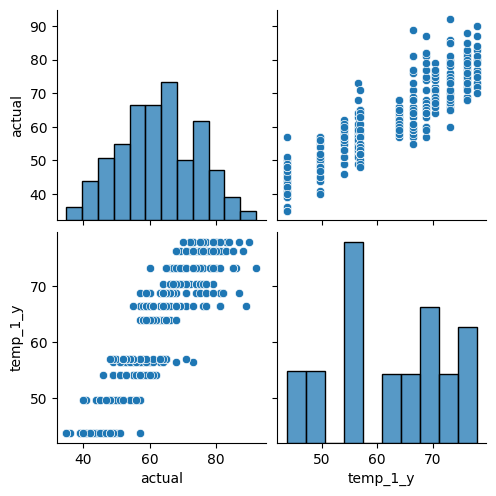

In [40]:
import seaborn as sns

sns.pairplot(df[['actual','temp_1_y']])

<Axes: >

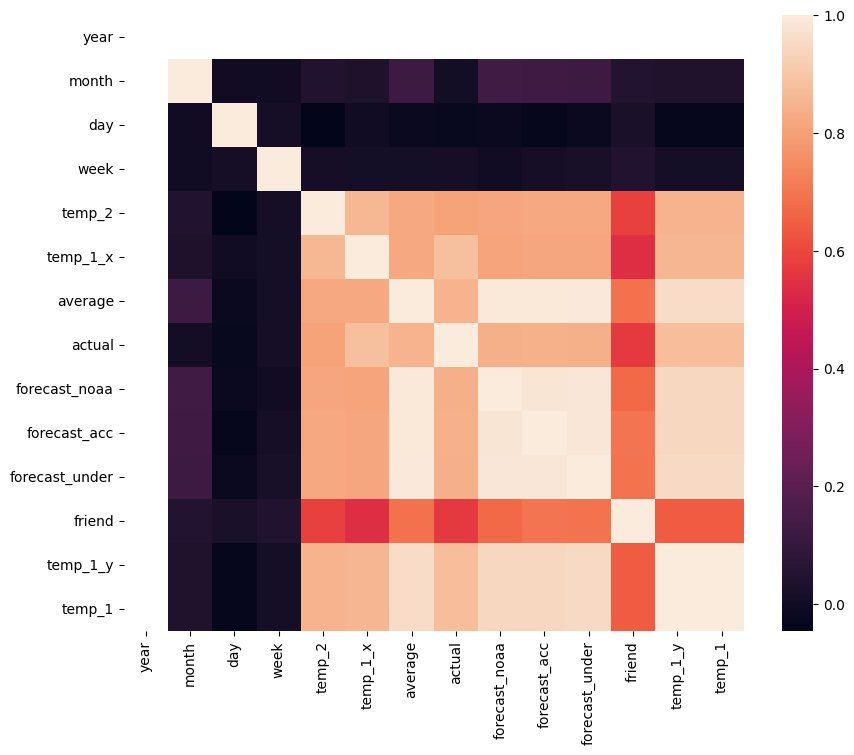

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

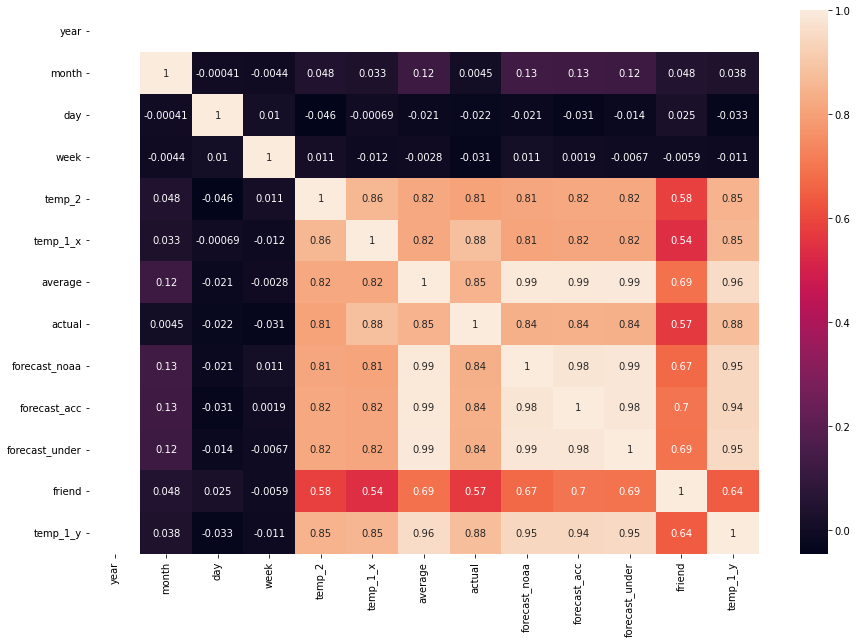

In [32]:
import matplotlib.pyplot as plt

### 3. Divide en train y test

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['actual','year', 'day','week','temp_1'], axis=1),df['actual'], test_size=0.2, random_state=42)
# quitamos esas columnas porq el año no aporta nada, y las otras tampoco (las de forecast tb podriamos quitarlos)
# también el train_size existe. El que imputemos tiene la prioridad en cuanto a que los decimales de la división se quedan en él.(las filas no pueden dividirse en decimales, solo en enteros)


In [42]:
print('X_test',X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

X_test (70, 9)
(278, 9)
(70,)
(278,)


### 4. Entrena el modelo


In [43]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(random_state=73) #porque queremos un numero continuo. PERO ACTUAL es un int, está asi por comodidad.
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=73)

In [44]:
X_train.columns

# por qué tengo una columna más?


Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [45]:
dtr.feature_importances_
# 

array([0.02006242, 0.02288678, 0.76967774, 0.11132778, 0.0154464 ,
       0.02107549, 0.02013524, 0.01697698, 0.00241118])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [46]:
y_pred = dtr.predict(X_test)

In [48]:
y_pred

array([80., 68., 57., 64., 72., 76., 71., 79., 59., 71., 68., 67., 39.,
       68., 79., 57., 65., 59., 57., 65., 59., 57., 70., 55., 63., 48.,
       66., 45., 58., 77., 71., 64., 57., 79., 75., 60., 51., 51., 74.,
       40., 77., 59., 81., 41., 58., 76., 55., 85., 51., 39., 45., 39.,
       63., 64., 74., 61., 55., 61., 60., 53., 71., 46., 71., 71., 60.,
       59., 71., 67., 80., 39.])

In [53]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred))) 
# print("RMSE", (mean_squared_error(y_test, y_pred, squared=False))) es lo mismoque el de justo arriba

Coeficiente determinación 0.6461911656527679
MAE 5.5285714285714285
MAPE 0.08762906788190418
MSE 49.47142857142857
RMSE 7.033592863638652


**No hemos hecho Cross validation, porque solo ibamos a probar un solo modelo**

In [54]:
print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train)))) 

# hacemos todo de una, y da MODELO PERFECTO porq el arbol tienen a overfitting. HABRIA QUE PODAR

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


### 6. Representa el árbol de decision

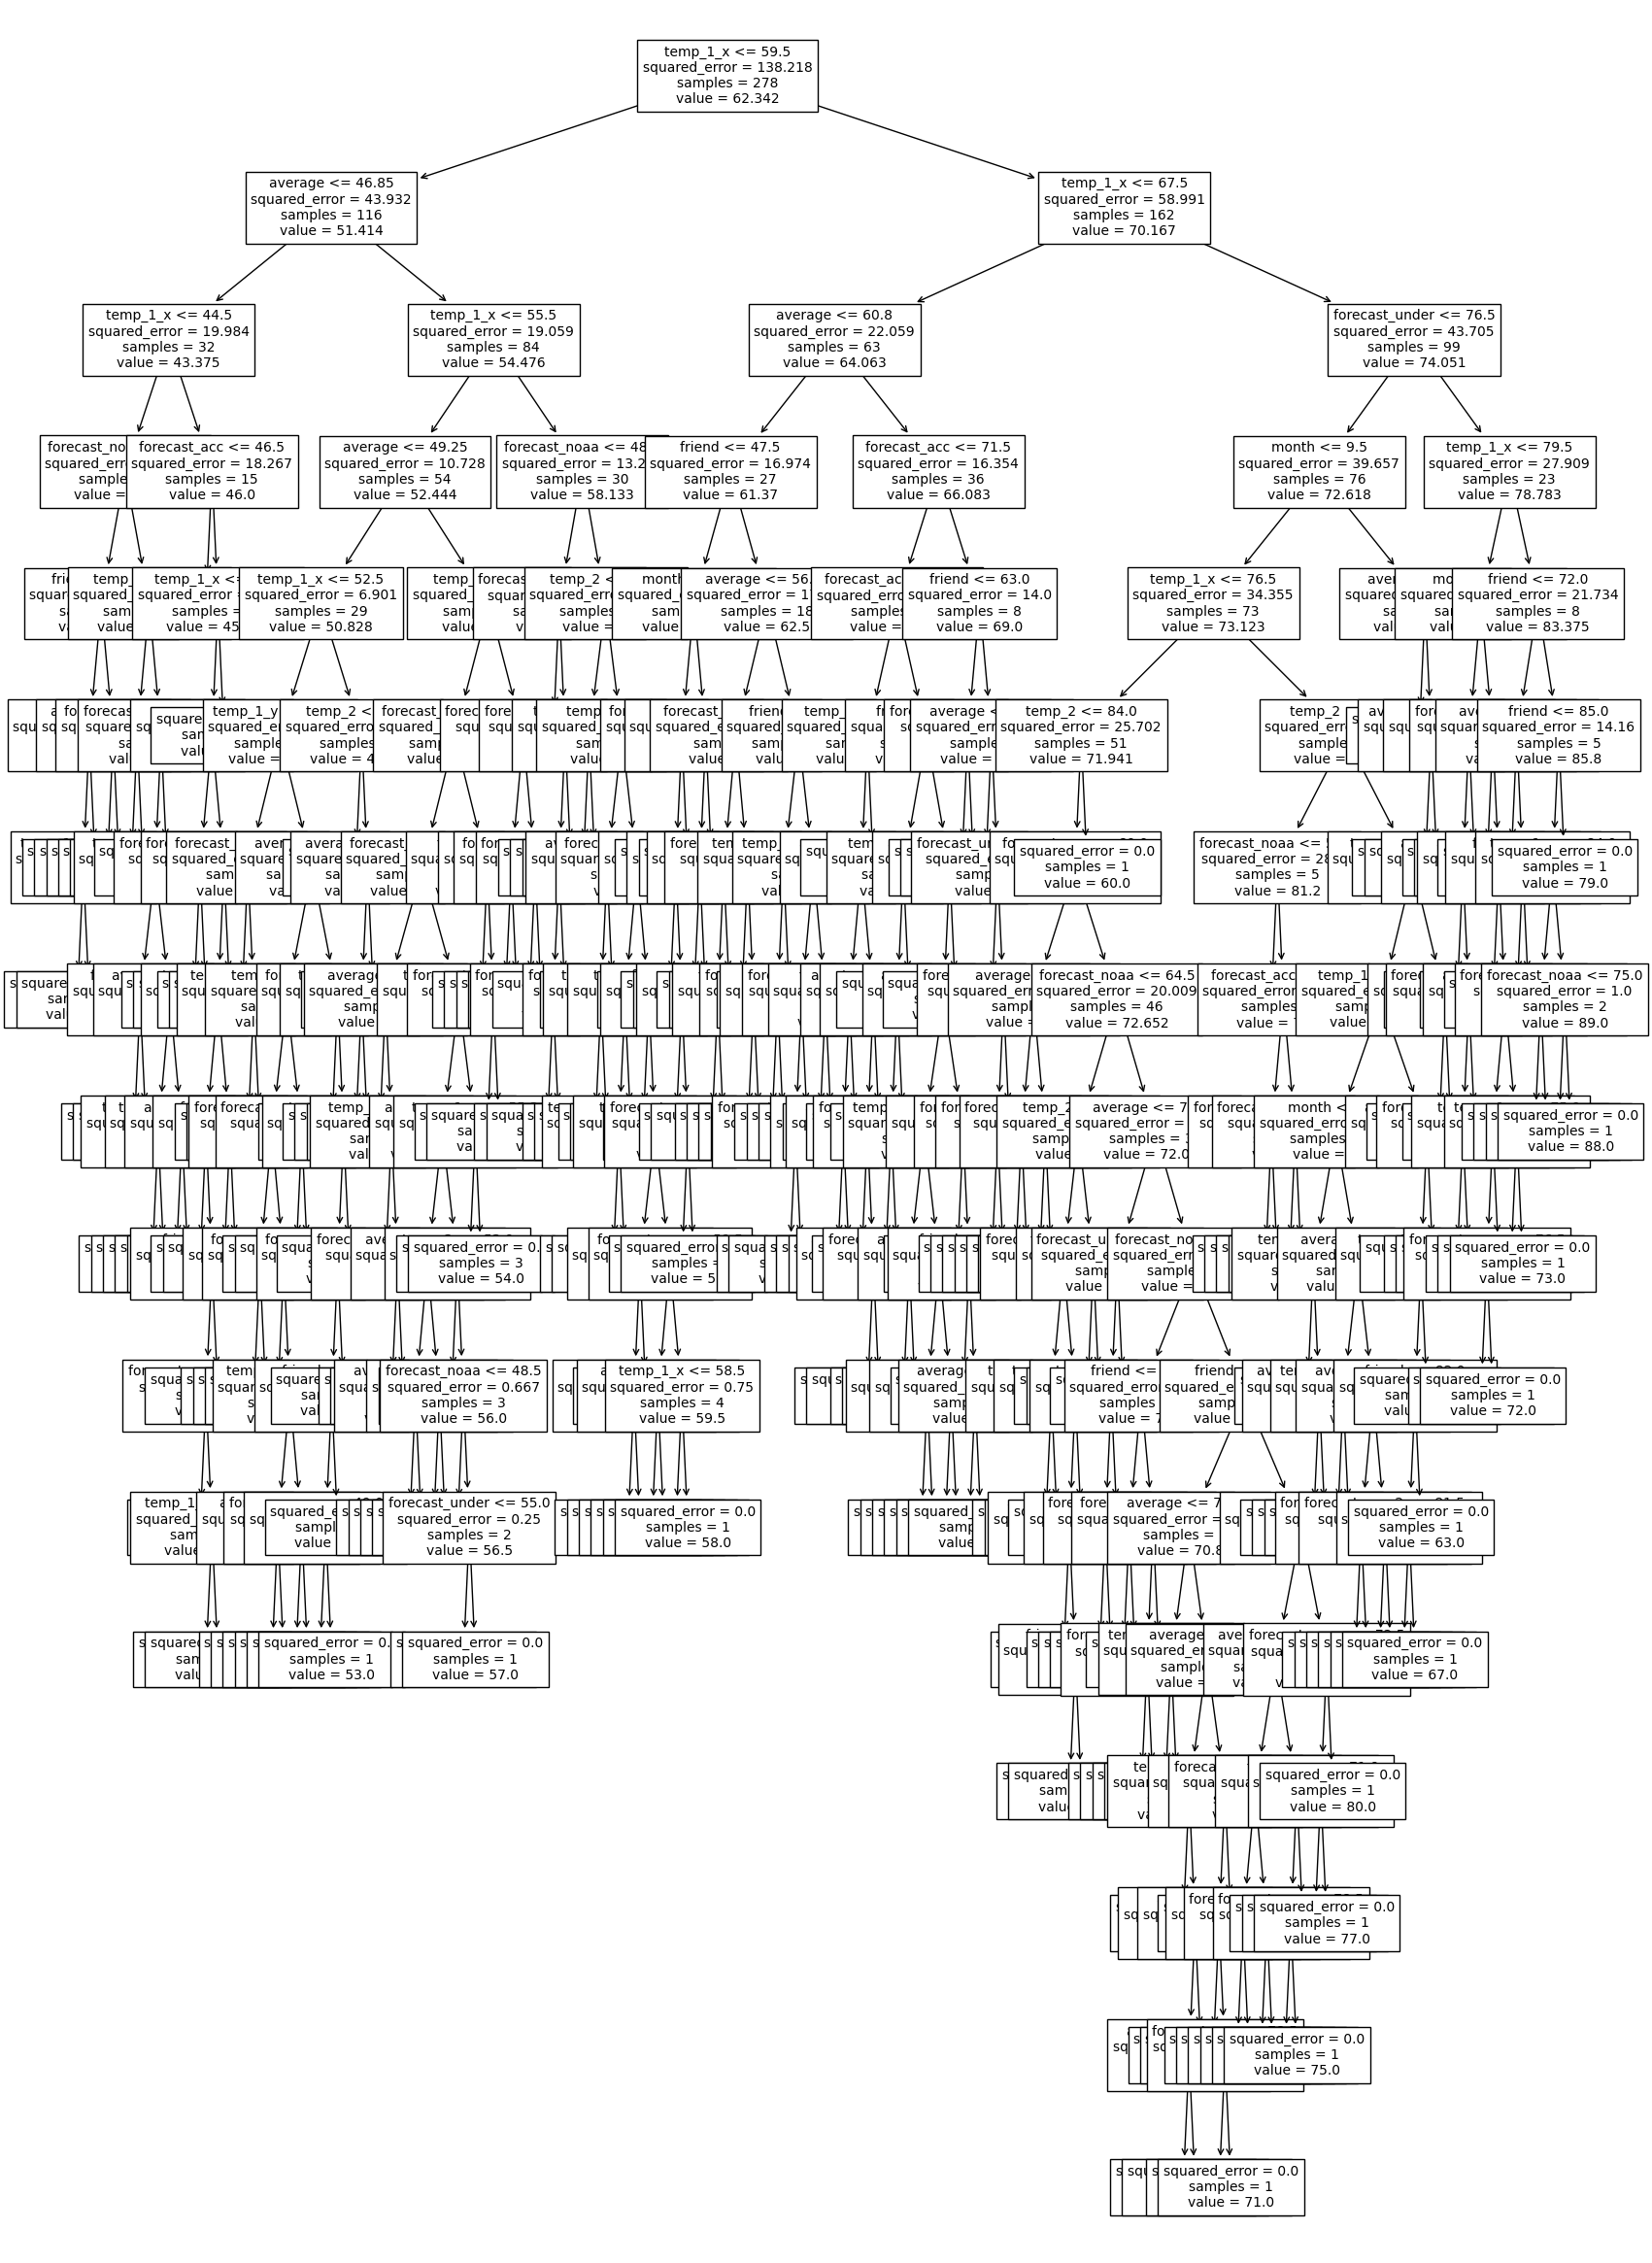

In [55]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, fontsize=10);

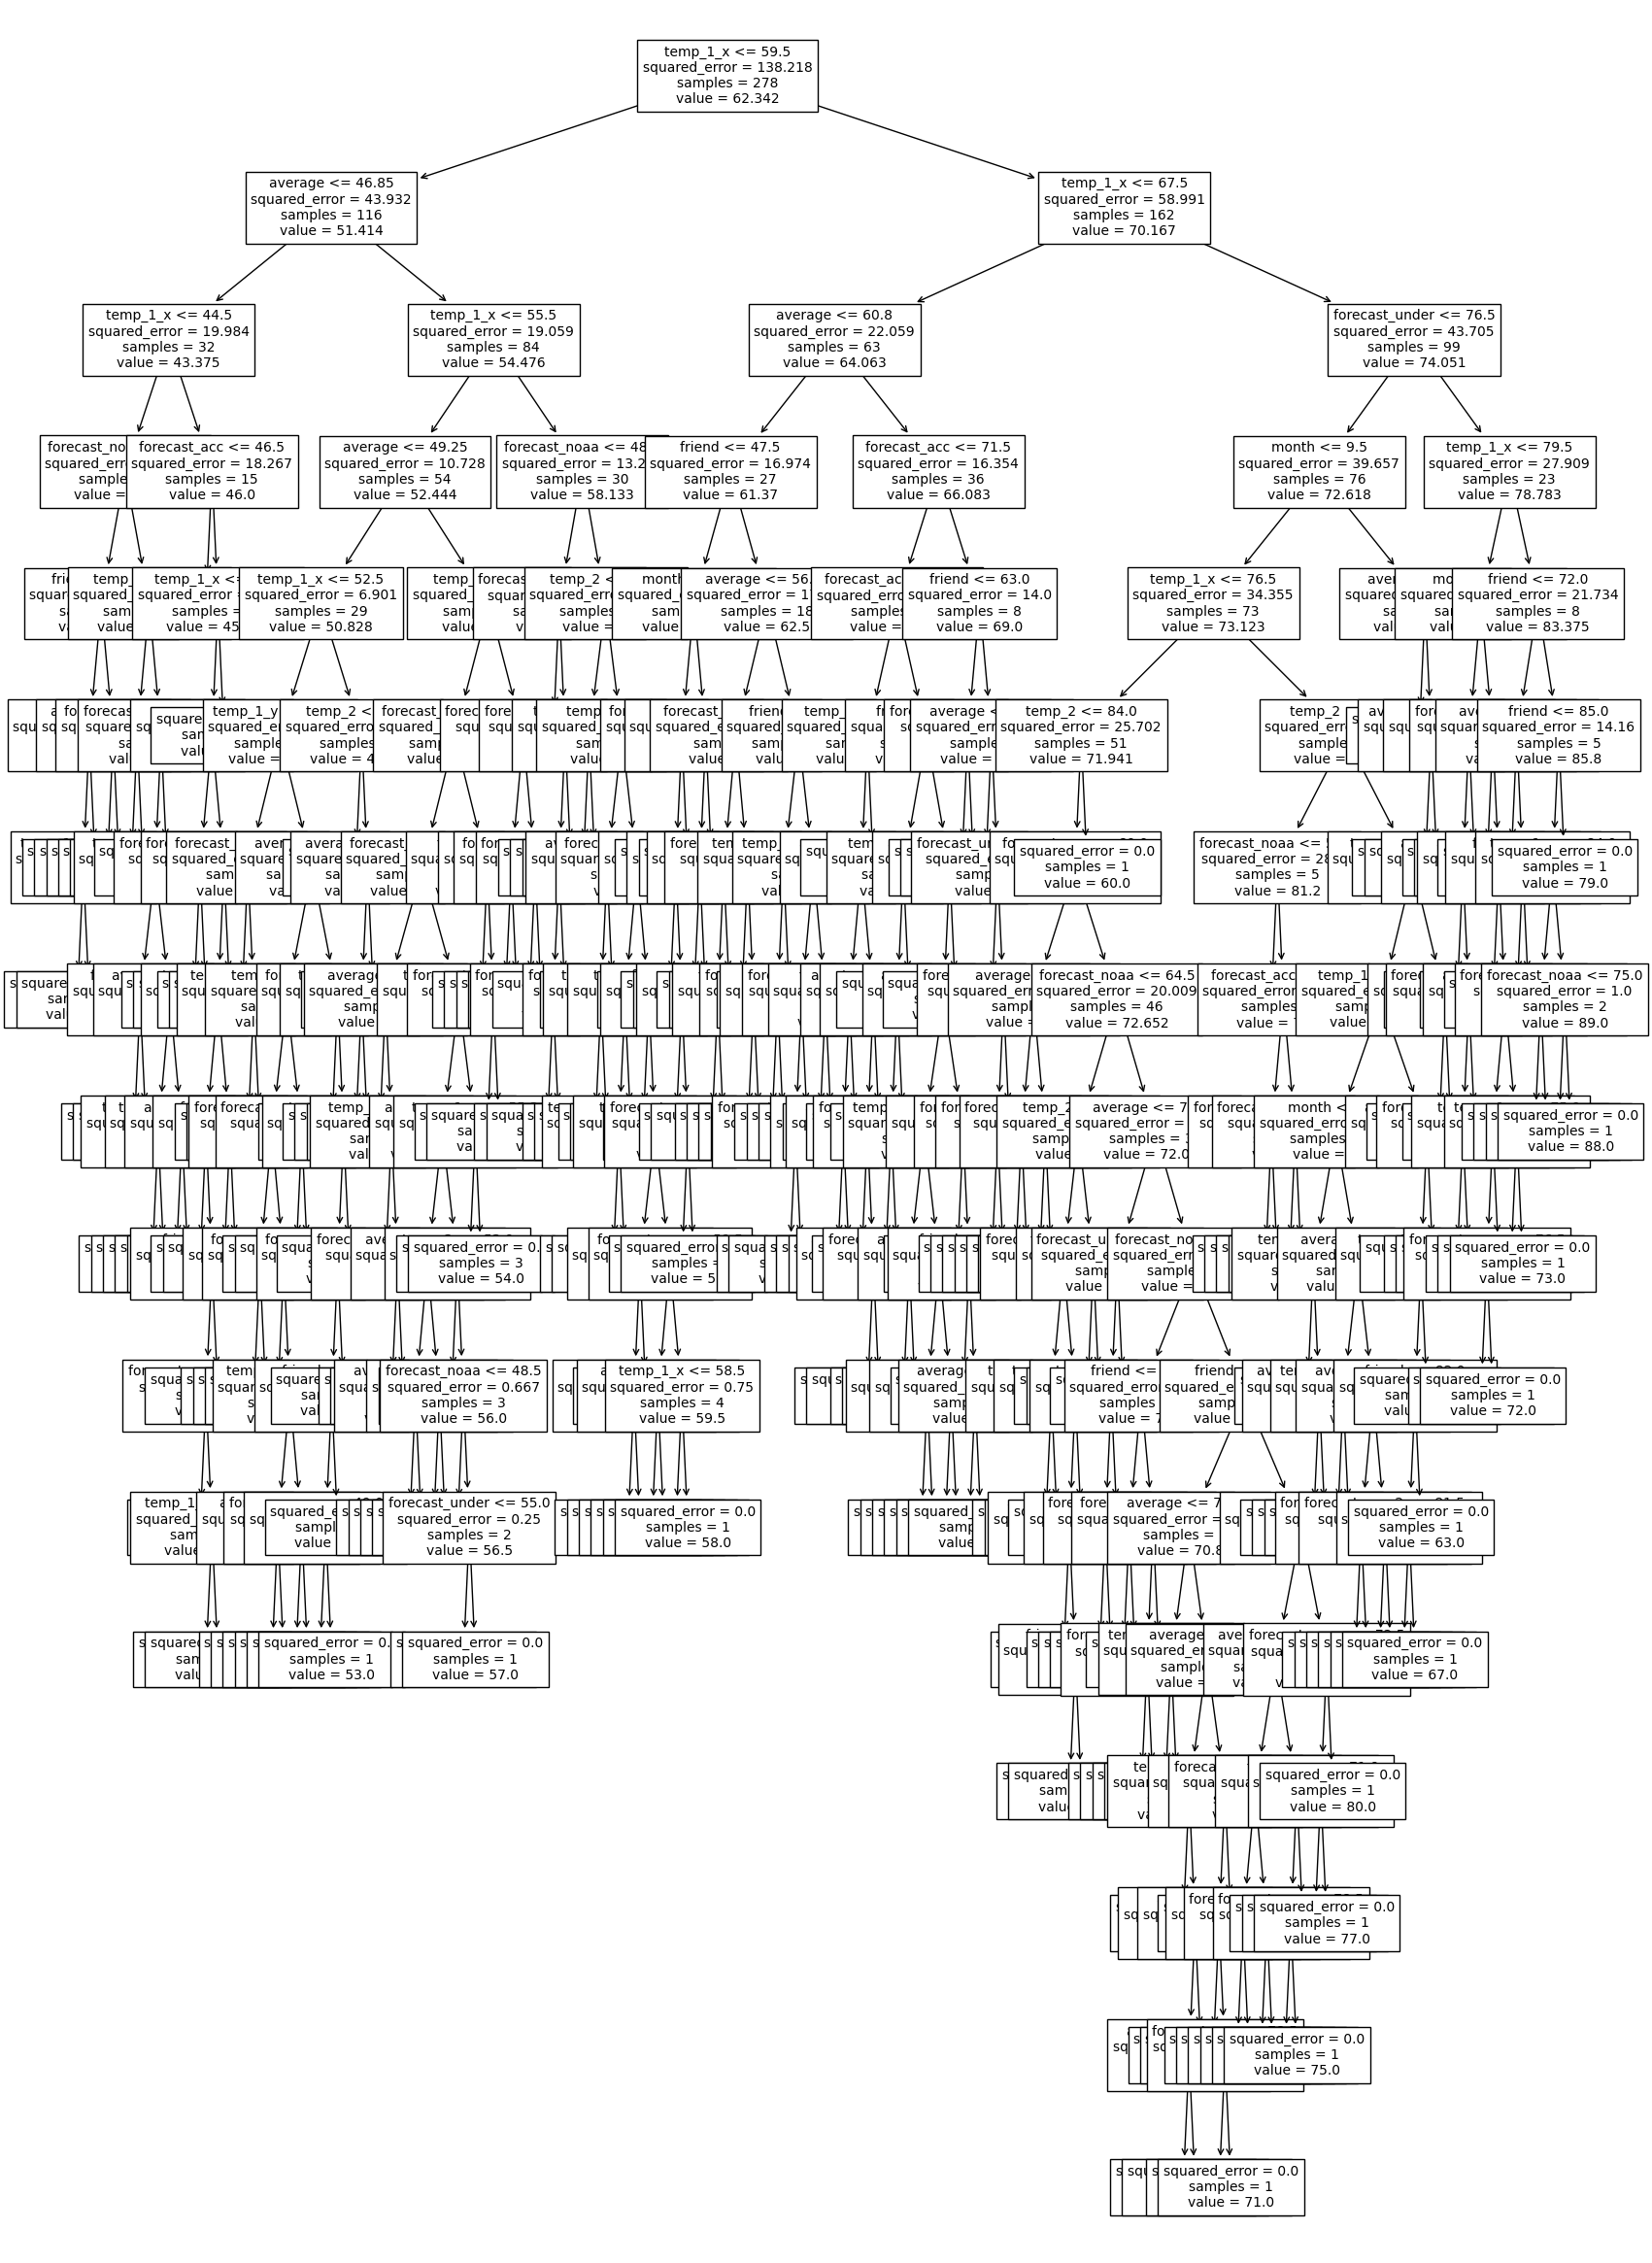

In [59]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, class_names = ['actual'], fontsize=10); #PARA DETERMINAR LA CLASE EN CADA UNO DE LOS NODOS

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [61]:
dtr_3 = DecisionTreeRegressor(max_depth=3, random_state=73)
dtr_3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=73)

### 8. Vuelve a evaluar tu modelo

In [62]:
y_pred3 = dtr_3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred3))
print("MAE", mean_absolute_error(y_test, y_pred3))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred3))
print("MSE", mean_squared_error(y_test, y_pred3))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred3)))

Coeficiente determinación 0.7560526120516178
MAE 4.5567196265742504
MAPE 0.07147155657048516
MSE 34.11001819765438
RMSE 5.840378258097191


### 9. Vuelve a representar su árbol

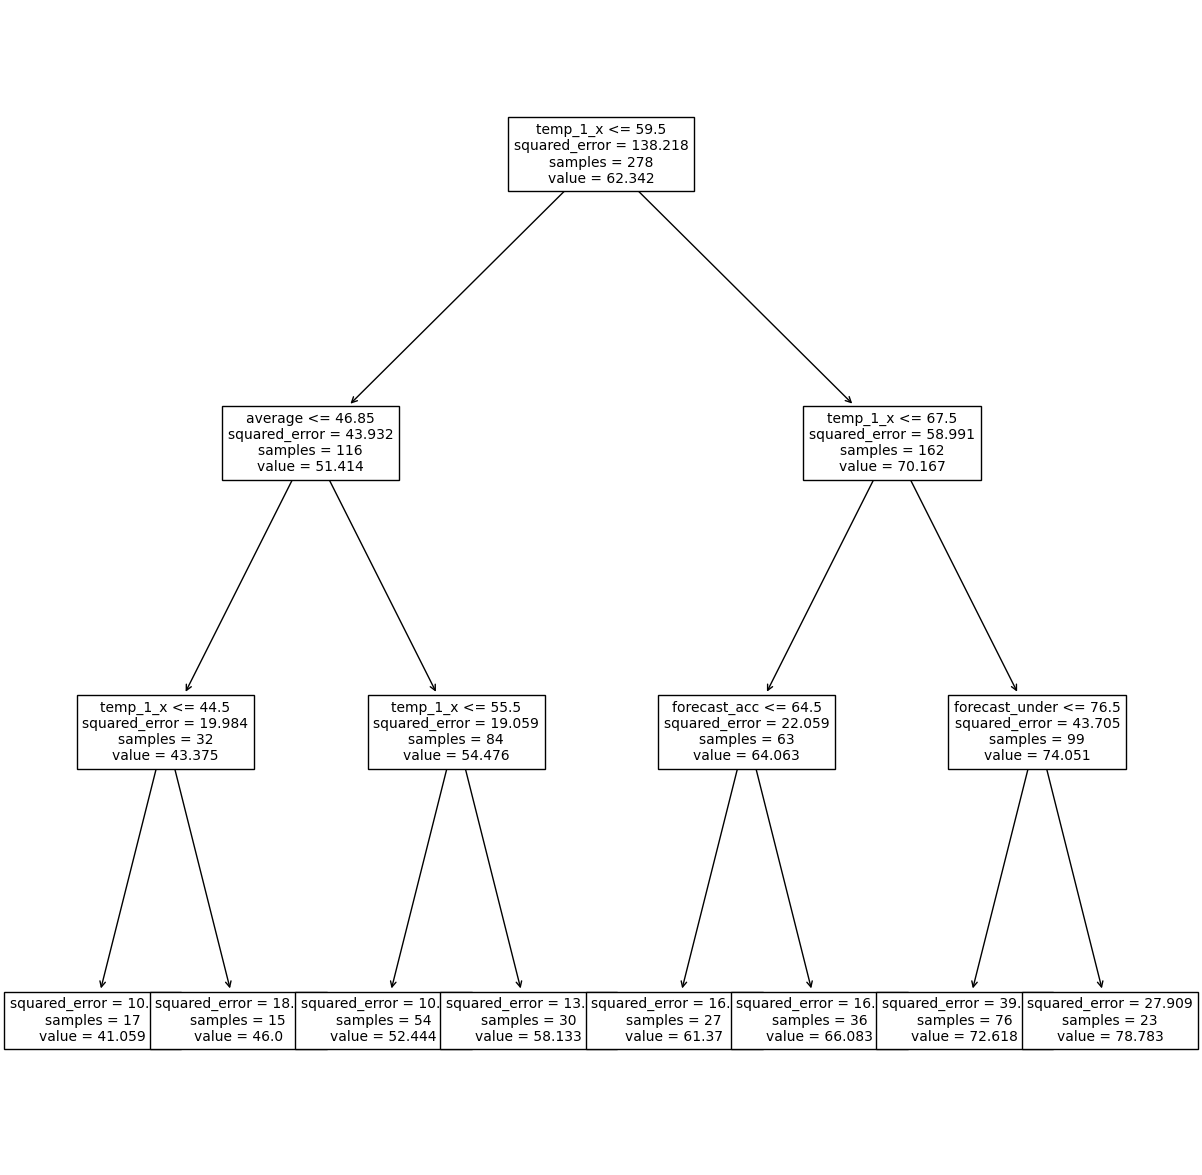

In [63]:
plt.figure(figsize=(15,15))

plot_tree(dtr_3, feature_names = X_train.columns, class_names = ['actual'],fontsize=10); #max_depth cambia la profundidad de la visualización

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [64]:
dtr_3.feature_importances_

array([0.        , 0.        , 0.88020751, 0.08841159, 0.        ,
       0.01060993, 0.02077097, 0.        , 0.        ])

In [65]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [66]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr_3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
2,temp_1_x,0.880208
3,average,0.088412
6,forecast_under,0.020771
5,forecast_acc,0.010610
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


In [67]:
X_train,X_test, y_train, y_test = train_test_split(df['temp_1_x','average', 'forecast_under'], df['actual'], test_size=0.2, random_state=42)


KeyError: ('temp_1_x', 'average', 'forecast_under')

In [44]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [45]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7808716556460724
MAE 4.211293169322524
MAPE 0.06564409571791573
MSE 30.63968782939335
RMSE 5.5353128032111565


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

In [46]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,45,43,50,44,29
1,2016,1,2,2,44,45,45.7,44,41,50,44,61
2,2016,1,3,3,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,5,41,40,46.0,44,46,46,46,41


temperatura actual < 15 grados

In [48]:

# X = df.drop(columns=['actual'])  
# y = (df['actual'] != 59).astype(int) 


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train, y_train)


# y_pred = clf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


Accuracy: 0.9428571428571428


In [70]:
df_4 = df.copy()
df_4['target_class'] = (df_4['actual'] != 59).astype(int)
df_4

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y,temp_1,target_class
0,2016,1,1,0,45,45,45.6,45,43,50,44,29,49.677419,49.677419,1
1,2016,1,2,2,44,45,45.7,44,41,50,44,61,49.677419,49.677419,1
2,2016,1,3,3,45,44,45.8,41,43,46,47,56,49.677419,49.677419,1
3,2016,1,4,1,44,41,45.9,40,44,48,46,53,49.677419,49.677419,1
4,2016,1,5,5,41,40,46.0,44,46,46,46,41,49.677419,49.677419,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47,43.741935,43.741935,1
344,2016,12,28,6,42,47,45.3,48,41,49,44,58,43.741935,43.741935,1
345,2016,12,29,4,47,48,45.3,48,43,50,45,65,43.741935,43.741935,1
346,2016,12,30,0,48,48,45.4,57,44,46,44,42,43.741935,43.741935,1


In [71]:
df_5 = df.copy()
df_5['target_class'] = np.where(df_5['actual']>59, 1,0)
df_5[['actual','target_class']]


,actual,target_class
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0
...,...,...
343,47,0
344,48,0
345,48,0
346,57,0


In [74]:
# !pip uninstall matplotlib
# !pip install matplotlib==3.7.3

<Axes: >

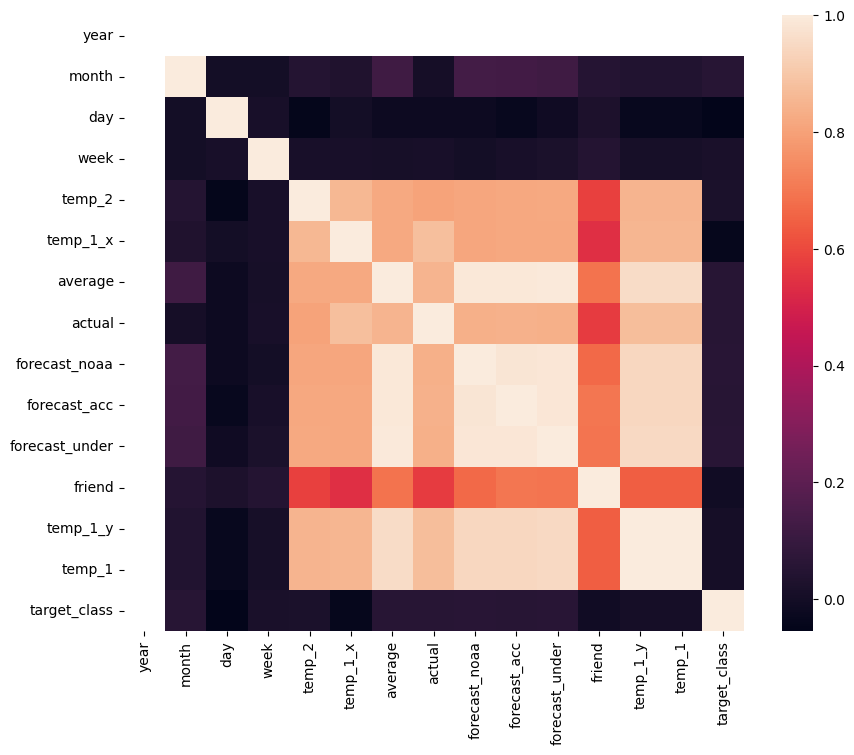

In [77]:
plt.figure(figsize=(10,8))
sns.heatmap(df_4.corr(), xticklabels=True, yticklabels=True)

<AxesSubplot:>

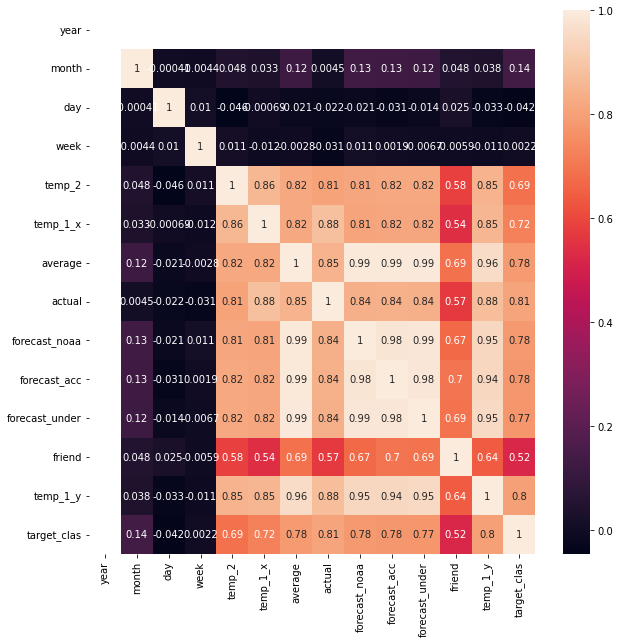

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df_4.corr(), annot=True)

In [79]:
df_5['target_class'].value_counts()

target_class
1    204
0    144
Name: count, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_5.drop(columns=['year','day','week','actual','target_class','temp_1']), df_5['target_class'], test_size=0.2, random_state=42)

In [92]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [93]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [94]:
dtc.feature_importances_

array([0.        , 0.        , 0.09828577, 0.83792502, 0.05793051,
       0.        , 0.        , 0.0058587 , 0.        ])

In [95]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9142857142857143

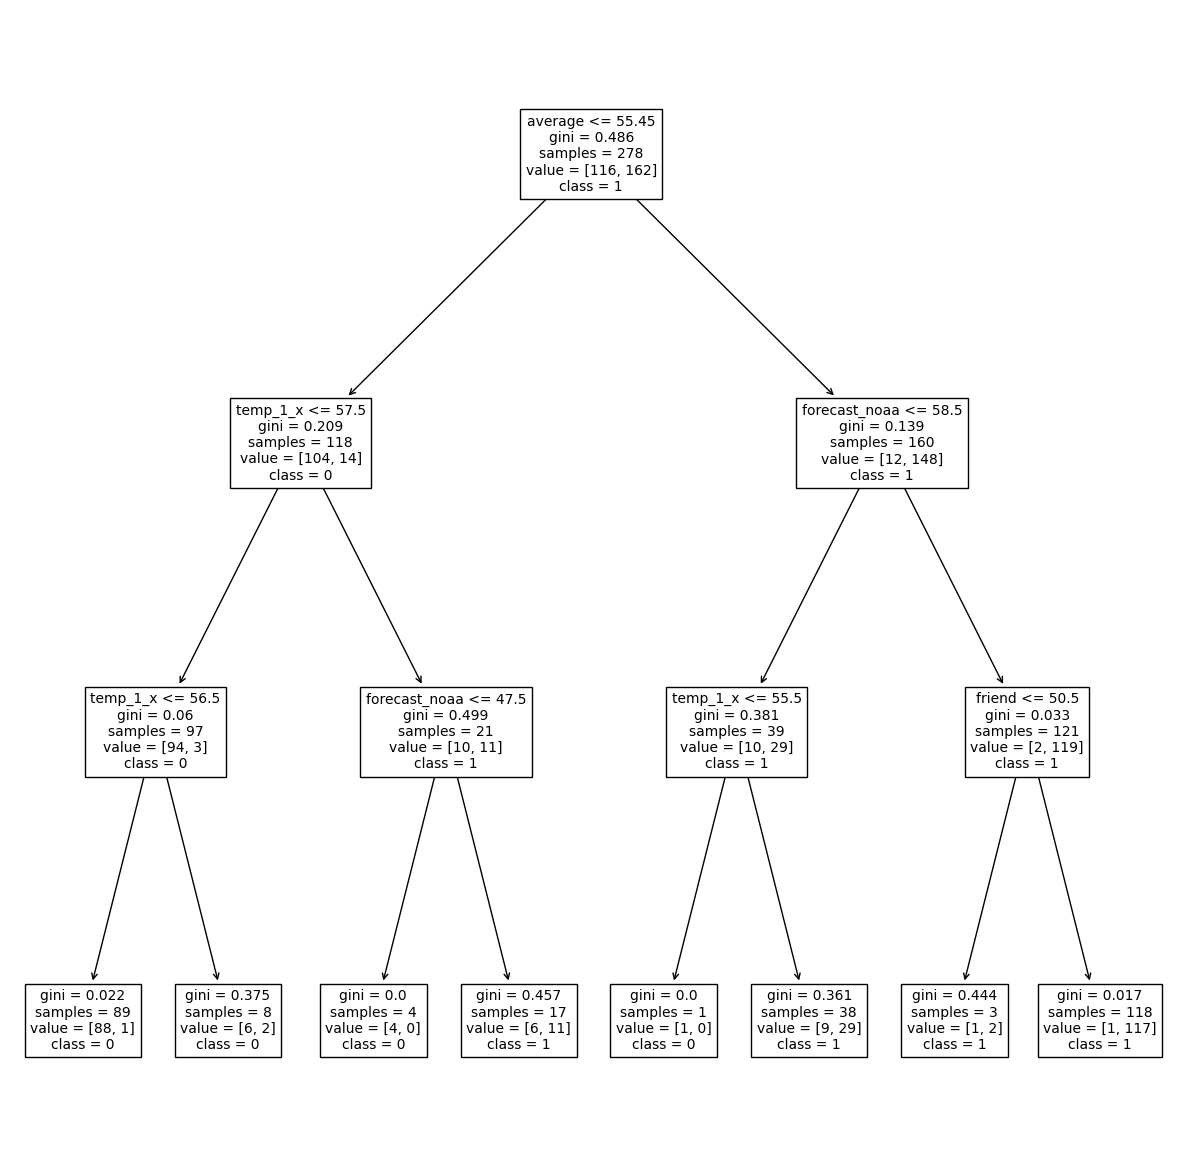

In [96]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = ['0','1'], fontsize=10); #max_depth cambia la profundidad de la visualización

In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

0.8142857142857143

In [102]:
df.head()

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y,temp_1
0,2016,1,1,0,45,45,45.6,45,43,50,44,29,49.677419,49.677419
1,2016,1,2,2,44,45,45.7,44,41,50,44,61,49.677419,49.677419
2,2016,1,3,3,45,44,45.8,41,43,46,47,56,49.677419,49.677419
3,2016,1,4,1,44,41,45.9,40,44,48,46,53,49.677419,49.677419
4,2016,1,5,5,41,40,46.0,44,46,46,46,41,49.677419,49.677419


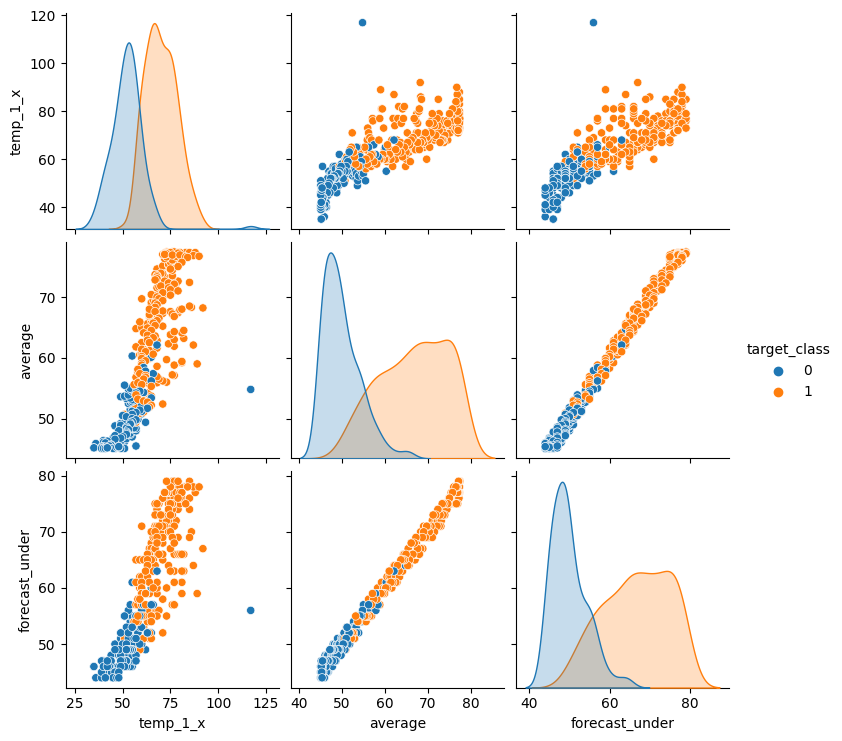

In [104]:
sns.pairplot(df_5[['temp_1_x','average','forecast_under','target_class']], hue='target_class')